In [5]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers

In [6]:
data = pd.read_csv('resources/book_reviews_sample.csv')

In [3]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [7]:
# cleanse - remove punct, to lower
data['reviewText_lowercase_no_punct'] = data.apply(lambda x: re.sub(r'[^\w\s]', '', x['reviewText']).lower(), axis=1)

In [7]:
data.head(5)

,index,reviewText,rating,reviewText_lowercase_no_punct
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [10]:
vader_statement = SentimentIntensityAnalyzer()

In [14]:
data['vader_sentiment_score'] = data.apply(lambda row : vader_statement.polarity_scores(row['reviewText_lowercase_no_punct'])['compound'], axis=1)

In [16]:
data['vader_sentiment_score'].head(5)

0    0.7684
1    0.9325
2    0.6740
3    0.6652
4   -0.4767
Name: vader_sentiment_score, dtype: float64

In [18]:
bins = [-1, -0.1, 0.1, 1]
names = ['Negative', 'Neutral', 'Positive']
data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins=bins, labels=names)

In [19]:
data.head(5)

,index,reviewText,rating,reviewText_lowercase_no_punct,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,Positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,Positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,Positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,Positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,Negative


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='vader_sentiment_label'>

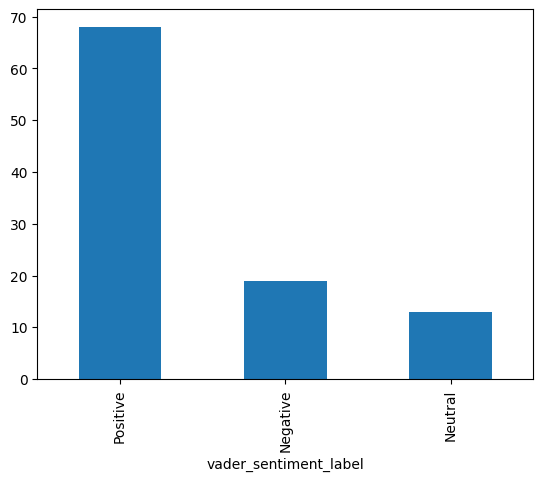

In [26]:
data['vader_sentiment_label'].value_counts().plot(kind='bar')

In [2]:
from transformers import pipeline
transformers_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [14]:
data['transformer_sentitment_label'] = data.apply(lambda row : transformers_pipeline(row['reviewText_lowercase_no_punct'])[0]['label'], axis=1)

In [15]:
data['transformer_sentitment_label'].head(5)

0    POSITIVE
1    POSITIVE
2    NEGATIVE
3    NEGATIVE
4    NEGATIVE
Name: transformer_sentitment_label, dtype: object

<Axes: xlabel='transformer_sentitment_label'>

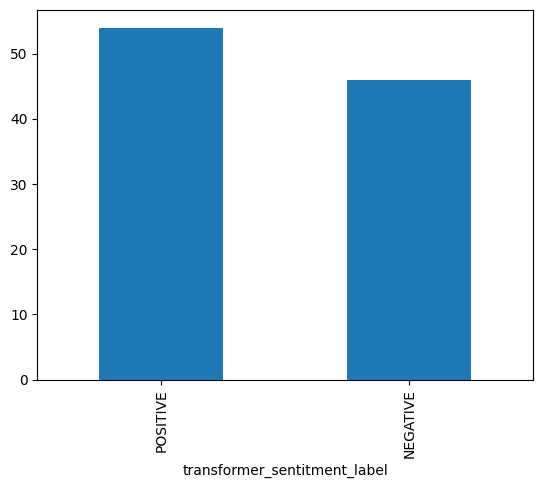

In [16]:
data['transformer_sentitment_label'].value_counts().plot(kind='bar')